# Predecir enfermedades del corazón usando algoritmos de aprendizaje automático (Machine Learning - ML)
* inspirado en :
  - https://www.kaggle.com/code/faressayah/practical-guide-to-6-classification-algorithms

  - https://www.kaggle.com/code/mdriponmiah/heart-disease-prediction-capstone-project

  - https://www.kaggle.com/code/bulentsiyah/heart-disease-prediction-using-neural-networks

  - https://www.kaggle.com/code/abdelali97/heart-disease-prediction-using-ann/notebook

# Definir el problema y entendimiento del dominio:

- Las enfermedades cardiovasculares se constituyen como la principal causa de muerte en todo el mundo. La incidencia de las enfermedades cardiovasculares entre la población mundial es muy elevada, comportando consecuencias nefastas para la salud de millones de personas.

- En este sentido, se estima que las cardiopatías representan el 16% del total de muertes en todo el mundo. En Ecuador, las enfermedades cardiovasculares son la principal causa de muerte, representando el 24% de los decesos anuales. En 2019, el porcentaje de muertes por enfermedades cardiovasculares alcanzó el 26.49% del total de defunciones.

* Entre las enfermedades cardiovasculares más frecuentes se encuentran:
  * Insuficiencia cardíaca
  * Hipertensión arterial
  * Exceso de colesterol
  * Infarto de miocardio
  * Angina de pecho
  * Trastornos del ritmo cardiaco

* Las enfermedades cardiovasculares son trastornos del corazón y de los vasos sanguíneos. Son prevenibles y se pueden controlar con hábitos saludables como: Evitar el tabaquismo, Controlar la presión arterial, Controlar los niveles de colesterol, Hacer ejercicio de tres a cuatro veces por semana.

* En los niños, las enfermedades cardíacas más comunes son las congénitas, como el soplo de corazón.

* Para reducir estas cifras, resulta necesario disponer de nuevos sistemas predictivos que ayuden a prevenirlas y, así, poder proceder a un abordaje clínico más rápido y eficaz. Hasta ahora, los modelos empleados para calcular el riesgo de padecer algún tipo de enfermedad cardiovascular han resultado insuficientes pero, gracias al Machine Learning esta realidad está a punto de cambiar.

### El objetivo, las condiciones y restricciones son:
- Mediante el modelamiento de los datos clínicos del paciente debemos predecir si éste sufre de alguna afección al corazón.
- Los datos deben contener una columna que especifique que el paciente bajo análisis, fue diagnosticado con alguna enfermedad del corazón. 1= si, 0=no.
- **Al evaluar un modelo de diagnóstico médico para una enfermedad potencialmente mortal, la métrica más adecuada es "recall" (también conocida como sensibilidad), ya que prioriza la identificación de todos los casos positivos verdaderos, incluso si eso significa aceptar una tasa más alta de falsos positivos, lo que es crucial para no pasar por alto ningún caso potencialmente fatal de la enfermedad.**
- Debido a la necesidad ética de preservar la identidad del paciente los datos deben omitir su identificación.

### Datos

- Para el presente ejercicio, y en vista de la **NO** disponibilidad de datos estadísicos oficiales o confiables, se utilizará como fuente de datos los disponibles en KAGGLE, con la siguiente descripción elaborada por expertos:

  * age - edad en años
  * sex - sexo (1 = masculino; 0 = femenino)
  * cp - dolor de pecho
    * tipo de dolor del pecho
      * 0: Typical angina: Dolor en el pecho relacionado con la disminución del suministro de sangre al corazón.
      * 1: Atypical angina: Dolor del pecho no relacionado con el corazón.
      * 2: Non-anginal pain: Espasmos esofágicos (no relacionados con el corazón)
      * 3: Asymptomatic: Dolor del pecho que no muestra signos de enfermedad.
  * trestbps - presión arterial en reposo (en mm Hg a la admisión en hospital) cualquier valor sobre 130-140 suele ser motivo de preocupación.
  * chol - colesterol sérico en mg/dl
    * serum = LDL + HDL + .2 * trigliceridos
    * sobre 200 es motivo de preocupación.
  * fbs - (fasting blood sugar (azúcar en sangre en ayunas) > 120 mg/dl)
    * (1 = verdadero; 0 = falso)
    * mayor que 126' mg/dL presume diabetes.
  * restecg - resultados electrocardiográficos en reposo
    * 0: Nada que destacar
    * 1: Anormalidad de la onda ST-T
      * Puede variar desde síntomas leves hasta problemas graves.
      * Señala latidos cardíacos anormales
    * 2: Posible o definitiva hipertrofia ventricular izquierda.
      * Cámara de bombeo principal del corazón agrandada.
  * thalach - frecuencia cardíaca máxima alcanzada
  * exang - angina inducida por ejercicio (1 = si; 0 = no)
  * oldpeak - La depresión del segmento ST inducida por el ejercicio en relación con el reposo analiza el estrés del corazón durante el ejercicio. Un corazón no saludable se estresará más.
  * slope - La pendiente del segmento ST del ejercicio máximo.
    * 0: Upsloping -Pendiente ascendente: mejor frecuencia cardíaca con el ejercicio (poco común)
    * 1: Flatsloping - Pendiente plana: cambio mínimo (corazón sano)
    * 2: Downslopins- Pendiente descendente: signos de un corazón enfermo
  * ca - Número de vasos principales (0-3) coloreados por fluorosopía
    * El vaso coloreado significa que el médico puede ver la sangre que pasa a través de él. Cuanto más sangre se mueva, mejor (sin coágulos)
  * thal: A blood disorder called thalassemia
    * Valor 0: NULO (eliminado del conjunto de datos anteriormente)
    * Valor 1: flujo sanguíneo normal
    * Valor 2: defecto fijo (no hay flujo sanguíneo en alguna parte del corazón)
    * Valor 3: defecto reversible (se observa un flujo sanguíneo pero no es normal)
  * target - esta enfermo o no (1=si, 0=no) (= el atributo a predecir)



In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [ ]:
df = pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## EDA
### El análisis exploratorio de datos  (Exploratory Data Analysis o EDA)
- Estudiar los datos y encontrar respuestas o patrones para el problema a resolver.
- Entender los tipos de datos y como debemos procesarlos.
- Buscar si hay datos faltantes y actuar adecuadamente para manejarlos.
- Encontrar valores atípicos y tratarlos correctamente.
- Analizar la posibilidad de eliminar, cambiar o agregar "features" para generar un modelo mas efectivo.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.duplicated().sum()

723

In [ ]:
df.duplicated().any()

True

In [ ]:
df.drop_duplicates(keep="first", inplace=True)

In [ ]:
df.shape

(302, 14)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df["target"].value_counts()

,count
target,
1,164
0,138


In [ ]:
# Verificar que "thal" no contenga valor cero
df["thal"].unique()


array([3, 2, 1, 0])

In [ ]:
df["thal"].value_counts()

,count
thal,
2,165
3,117
1,18
0,2


- Existen 2 filas con thal = 0, que deben eliminarse, de acuerdo a la descripción del propietario del data set

In [ ]:
df.loc[df["thal"] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
319,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1


In [ ]:
drop_index = df.loc[df["thal"] == 0].index
drop_index

Index([14, 319], dtype='int64')

In [ ]:
df.drop(drop_index, axis=0, inplace=True)


In [ ]:
df.shape

(300, 14)

In [ ]:
df["thal"].unique()

array([3, 2, 1])

In [ ]:
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

age: [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex: [1 0]
cp: [0 1 2 3]
trestbps: [125 140 145 148 138 100 114 160 120 122 112 132 118 124 106 104 135 130
 136 180 129 150 128 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol: [212 203 174 294 248 318 289 249 286 149 341 210 298 308 266 244 211 185
 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263 229
 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 204 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 264 276 322 214 273 253 176 284 305 168 407
 216 290 277 262 195 166 178 141]
fbs: [0 1]

In [ ]:
# Obtener una copia del DF para analisis dejando intacta la original, excepto por la eliminacion de "thal" = 0
df_copia = df.copy()
df_copia.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df_copia.loc[df_copia["thal"] == 0].index

Index([], dtype='int64')

In [ ]:
# Verificación
df_copia["thal"].value_counts()

,count
thal,
2,165
3,117
1,18


- Renombro la codificación para un mejor entendimiento de los datos y la posterior correcta determinacion de patrones.

In [ ]:
df_copia.sex = df_copia.sex.replace({0: "Femenino", 1: "Masculino"})
df_copia.cp = df_copia.cp.replace({0: "Angina típica", 1: "Angina atípica", 2: "Non-anginal pain", 3: "Asintomatico"})
df_copia.fbs = df_copia.fbs.replace({0: "Falso", 1: "Verdadero"})
df_copia.restecg = df_copia.restecg.replace({0: "Nada que destacar", 1: "Anormalidad de la onda ST-T", 2: "Posible o definitiva hipertrofia ventricular izquierda"})
df_copia.exang = df_copia.exang.replace({0: "Falso", 1: "Verdadero"})
df_copia.slope = df_copia.slope.replace({0: "Upsloping", 1: "Flatsloping", 2: "Downslopins"})
df_copia.ca = df_copia.ca.replace({0: "0 vasos coloreados", 1: "1 vaso coloreado", 2: "2 vasos coloreados", 3: "3 vasos coloreados", 4: "4 vasos coloreados"})
df_copia.thal = df_copia.thal.replace({1:"Flujo sanguíneo normal", 2:"No hay flujo sanguíneo en alguna parte del corazón", 3: "se observa un flujo sanguíneo pero no es normal"})
df_copia.target = df_copia.target.replace({0: "No enfermo", 1: "Esta enfermo"})

In [ ]:
df_copia.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Masculino,Angina típica,125,212,Falso,Anormalidad de la onda ST-T,168,Falso,1.0,Downslopins,2 vasos coloreados,se observa un flujo sanguíneo pero no es normal,No enfermo
1,53,Masculino,Angina típica,140,203,Verdadero,Nada que destacar,155,Verdadero,3.1,Upsloping,0 vasos coloreados,se observa un flujo sanguíneo pero no es normal,No enfermo
2,70,Masculino,Angina típica,145,174,Falso,Anormalidad de la onda ST-T,125,Verdadero,2.6,Upsloping,0 vasos coloreados,se observa un flujo sanguíneo pero no es normal,No enfermo
3,61,Masculino,Angina típica,148,203,Falso,Anormalidad de la onda ST-T,161,Falso,0.0,Downslopins,1 vaso coloreado,se observa un flujo sanguíneo pero no es normal,No enfermo
4,62,Femenino,Angina típica,138,294,Verdadero,Anormalidad de la onda ST-T,106,Falso,1.9,Flatsloping,3 vasos coloreados,No hay flujo sanguíneo en alguna parte del cor...,No enfermo


In [ ]:
df_copia.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,Femenino,Non-anginal pain,120,211,Falso,Nada que destacar,115,Falso,1.5,Flatsloping,0 vasos coloreados,No hay flujo sanguíneo en alguna parte del cor...,Esta enfermo
733,44,Femenino,Non-anginal pain,108,141,Falso,Anormalidad de la onda ST-T,175,Falso,0.6,Flatsloping,0 vasos coloreados,No hay flujo sanguíneo en alguna parte del cor...,Esta enfermo
739,52,Masculino,Angina típica,128,255,Falso,Anormalidad de la onda ST-T,161,Verdadero,0.0,Downslopins,1 vaso coloreado,se observa un flujo sanguíneo pero no es normal,No enfermo
843,59,Masculino,Asintomatico,160,273,Falso,Nada que destacar,125,Falso,0.0,Downslopins,0 vasos coloreados,No hay flujo sanguíneo en alguna parte del cor...,No enfermo
878,54,Masculino,Angina típica,120,188,Falso,Anormalidad de la onda ST-T,113,Falso,1.4,Flatsloping,1 vaso coloreado,se observa un flujo sanguíneo pero no es normal,No enfermo


In [ ]:
df_copia["target"].value_counts()


,count
target,
Esta enfermo,163
No enfermo,137


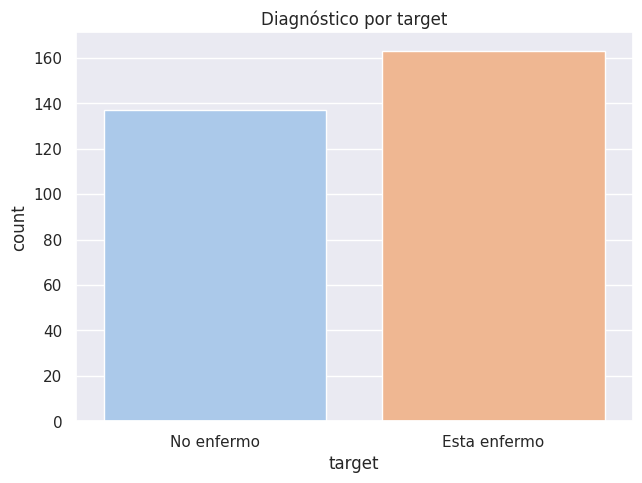

In [ ]:
%matplotlib inline
sns.set_style("darkgrid")
sns.set_theme()
sns.countplot(x="target", data=df_copia, hue="target", legend= False, palette="pastel")
plt.title("Diagnóstico por target")
plt.show()

* Los datos estan balanceados, es decir la cantidad de 0's (no esta enfermo) es similar a la de 1's (si esta enfermo)

In [ ]:
df_copia.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


* No hay pérdida de valores

In [ ]:
df_copia.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Masculino,Angina típica,125,212,Falso,Anormalidad de la onda ST-T,168,Falso,1.0,Downslopins,2 vasos coloreados,se observa un flujo sanguíneo pero no es normal,No enfermo
1,53,Masculino,Angina típica,140,203,Verdadero,Nada que destacar,155,Verdadero,3.1,Upsloping,0 vasos coloreados,se observa un flujo sanguíneo pero no es normal,No enfermo
2,70,Masculino,Angina típica,145,174,Falso,Anormalidad de la onda ST-T,125,Verdadero,2.6,Upsloping,0 vasos coloreados,se observa un flujo sanguíneo pero no es normal,No enfermo
3,61,Masculino,Angina típica,148,203,Falso,Anormalidad de la onda ST-T,161,Falso,0.0,Downslopins,1 vaso coloreado,se observa un flujo sanguíneo pero no es normal,No enfermo
4,62,Femenino,Angina típica,138,294,Verdadero,Anormalidad de la onda ST-T,106,Falso,1.9,Flatsloping,3 vasos coloreados,No hay flujo sanguíneo en alguna parte del cor...,No enfermo


In [ ]:
df_copia.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
for column in df_copia.columns:
    print(f"{column}: {df_copia[column].unique()}")

age: [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex: ['Masculino' 'Femenino']
cp: ['Angina típica' 'Angina atípica' 'Non-anginal pain' 'Asintomatico']
trestbps: [125 140 145 148 138 100 114 160 120 122 112 132 118 124 106 104 135 130
 136 180 129 150 128 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol: [212 203 174 294 248 318 289 249 286 149 341 210 298 308 266 244 211 185
 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263 229
 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 204 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 264 276 32

* Veamos la relacion de la variable target y cada una de las variables independientes con la finalidad de entender en mayor profundidad los datos y encontrar algun patrón.

In [ ]:
columnas_categoricas = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
columnas_numericas = ["age", "trestbps", "chol", "thalach", "oldpeak"]

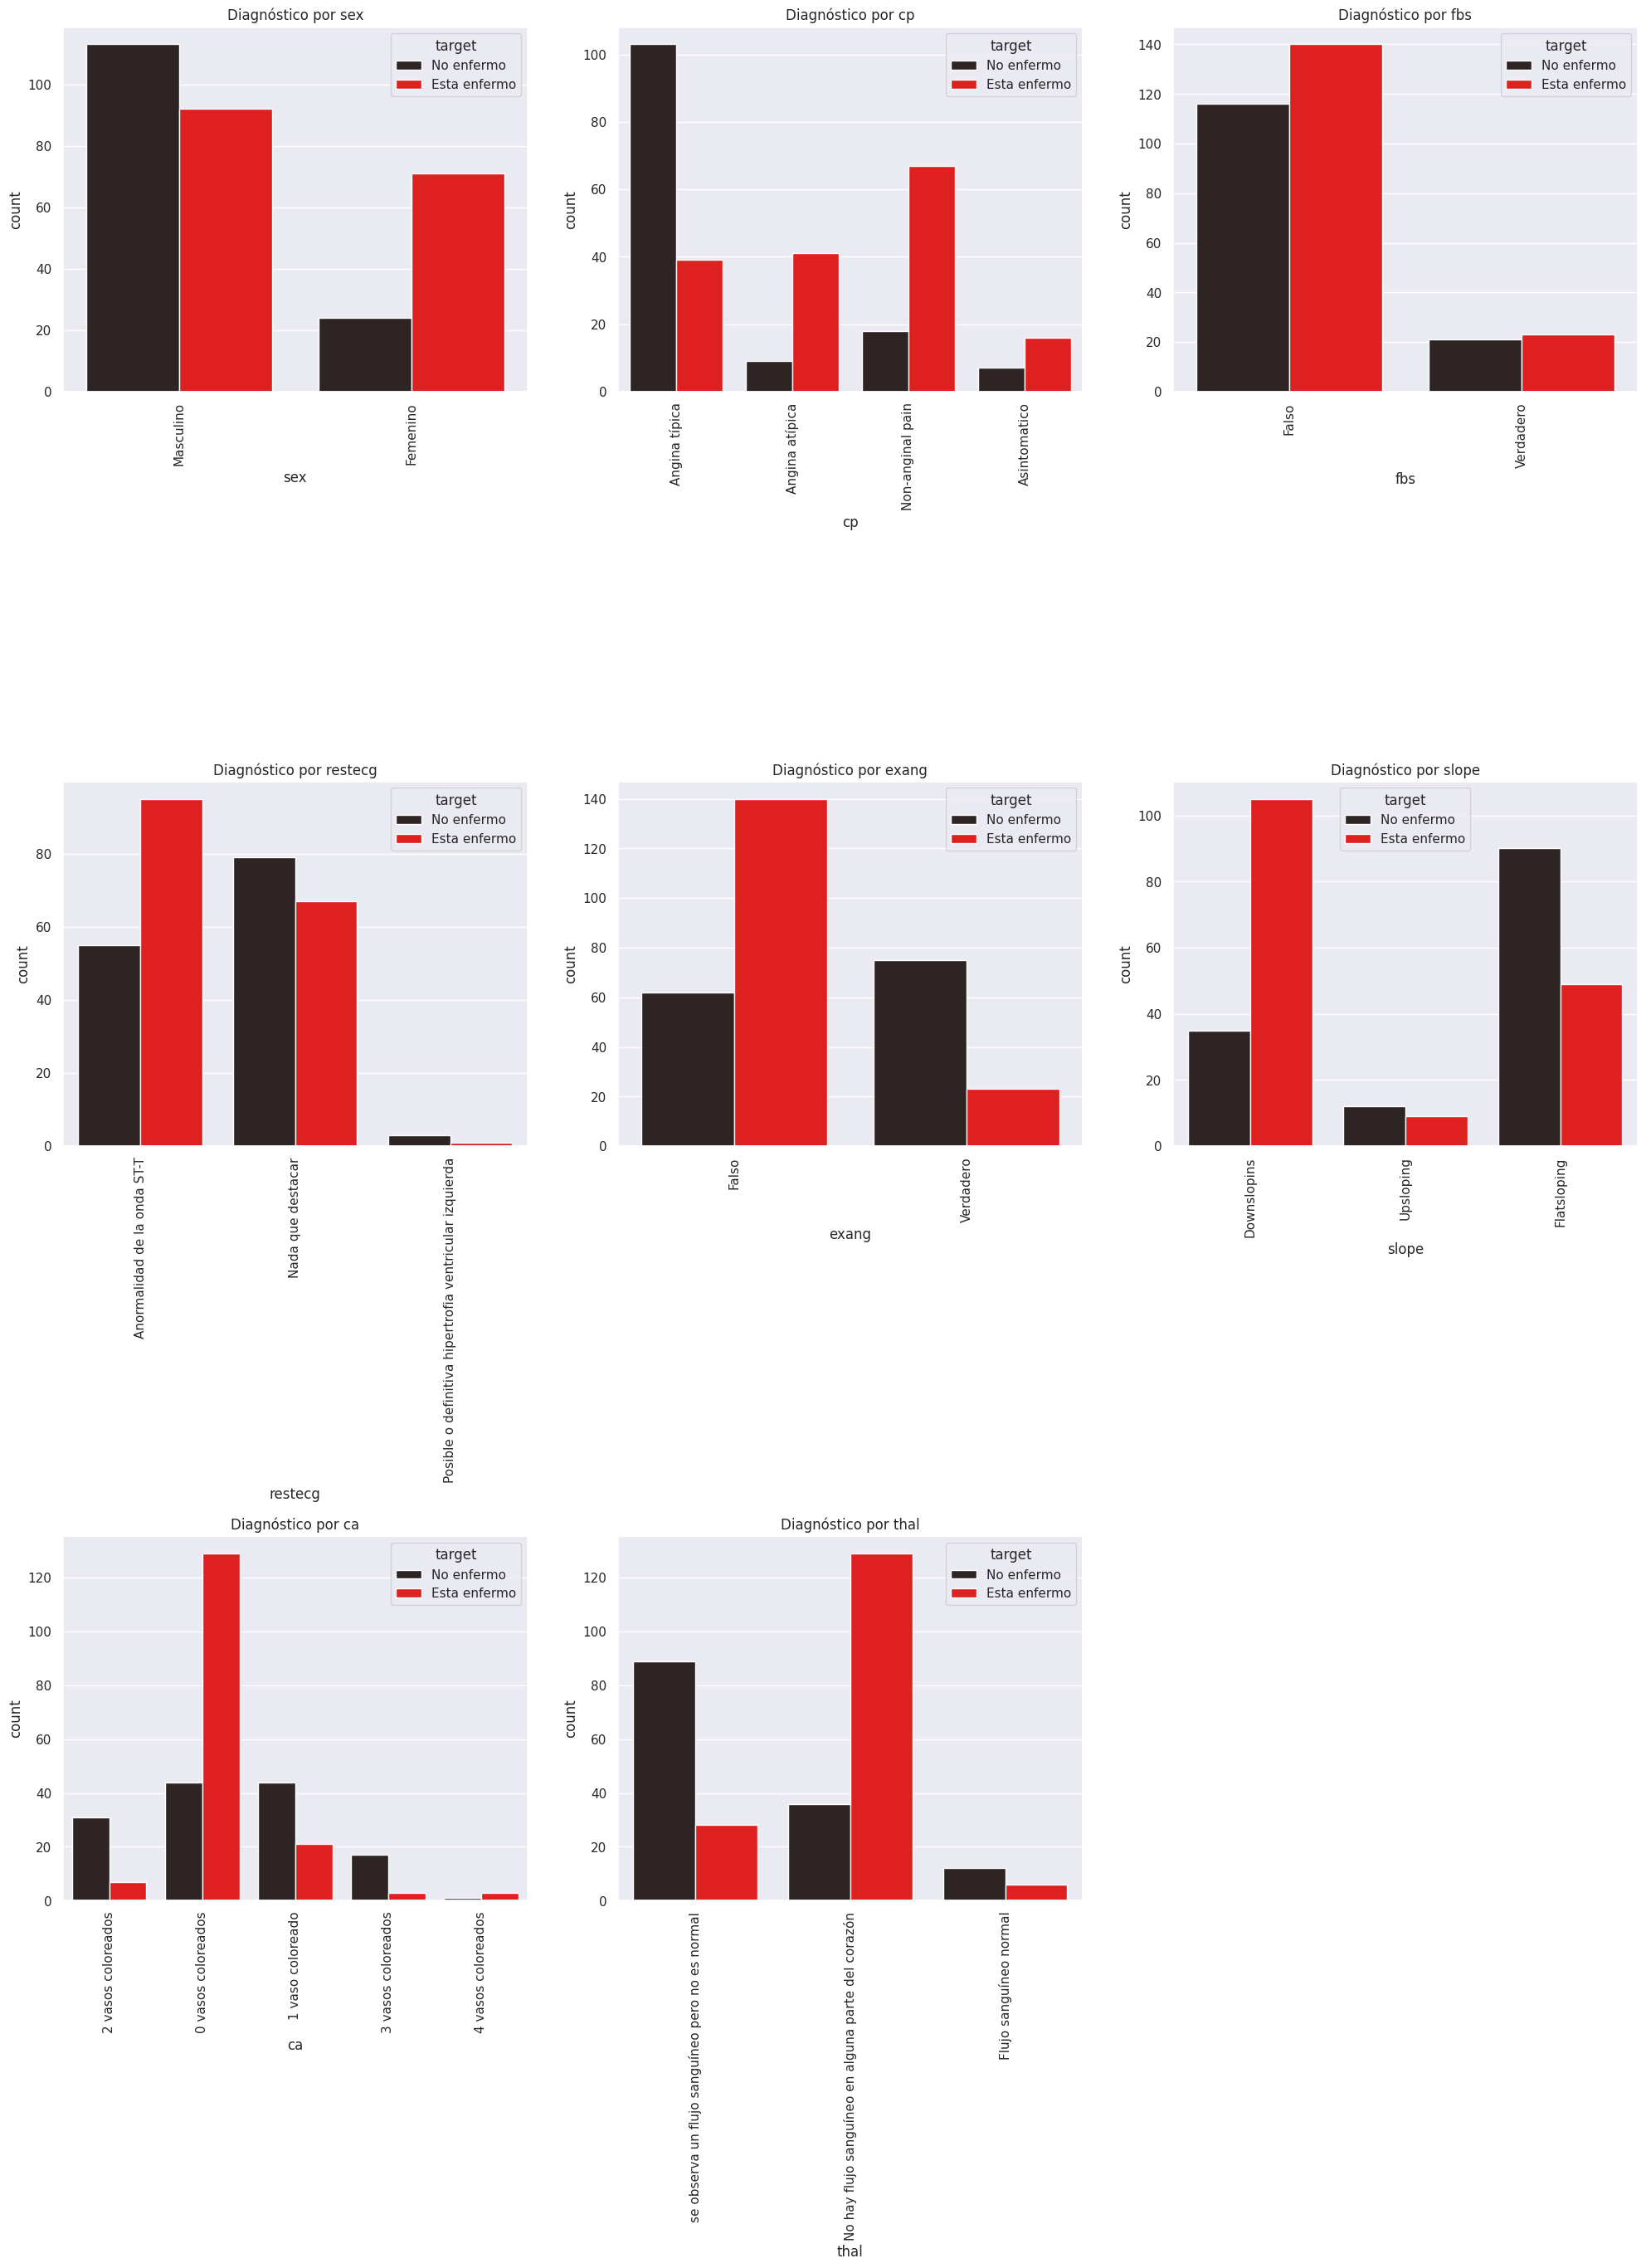

In [ ]:
plt.figure(figsize=(20, 25))

for i, column in enumerate(columnas_categoricas, 0):
   if len(df_copia[column].unique()) <= 10 and column != "target":
      plt.subplot(3, 3, i+1)
      sns.countplot(data=df_copia, x=column, hue="target", palette="dark:red")
      plt.title(f"Diagnóstico por {column}")
      plt.tight_layout()
      plt.xticks(rotation=90)


   # plt.xlabel(column)

* Interpretación
  - target - esta enfermo = 1, no esta enfermo= 0
  - Hay mas probabilidades de que personas de sexo femenino sean diagnosticadas enfermas y mas personas de sexo masculino sean diagnosticadas sanas.
  - Personas con dolor de pecho tipo 1,2 y 3 tiene mas posibilidades de ser diagnosticadas con enfermedad del corazón, que aquellas que tiene dolor del pecho tipo 0 (Angina típica)
    - 0: Angina típica: Dolor en el pecho relacionado con la disminución del suministro de sangre al corazón.
    - 1: Angina atípica : Dolor del pecho no relacionado con el corazón.
    - 2: Non-anginal pain: Espasmos esofágicos (no relacionados con el corazón)
    - 3: Asintomatico: Dolor del pecho que no muestra signos de enfermedad.
 - No existe una diferencia significativa en el diagnóstico de enfermedades del corazón cuando el azúcar en la sangre en ayunas es mayor o menor de 120 mg/dl.
 - Personas con valor 1 de restecg son mas propensas a tener enfermedades del corazón.
 - Personas a las que no se les indujo angina tienen enfermedad del corazón en mayor proporción que aquellas a las que no se les indujo.
 - Personas con downslopings son mas propensas a tener enfermedades del corazón que aquellas que calificaron con Upsloping (Mejor ritmo del corazón con ejercicio) o Flatsloping (cambios mínimos).
 - Personas con ca = 0 son mas propensas a tener enfermedades del corazón, ya que el vaso coloreado significa que el médico puede ver la sangre que pasa a través de él. Cuanto más sangre se mueva, mejor (sin coágulos).
 - Personas con thal = 2 defecto fijo (no hay flujo sanguíneo en alguna parte del corazón) son mas propensas a tener una enfermedad del corazón.



In [ ]:
print(columnas_numericas)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [ ]:
print(len(df_copia["oldpeak"].unique()))

40


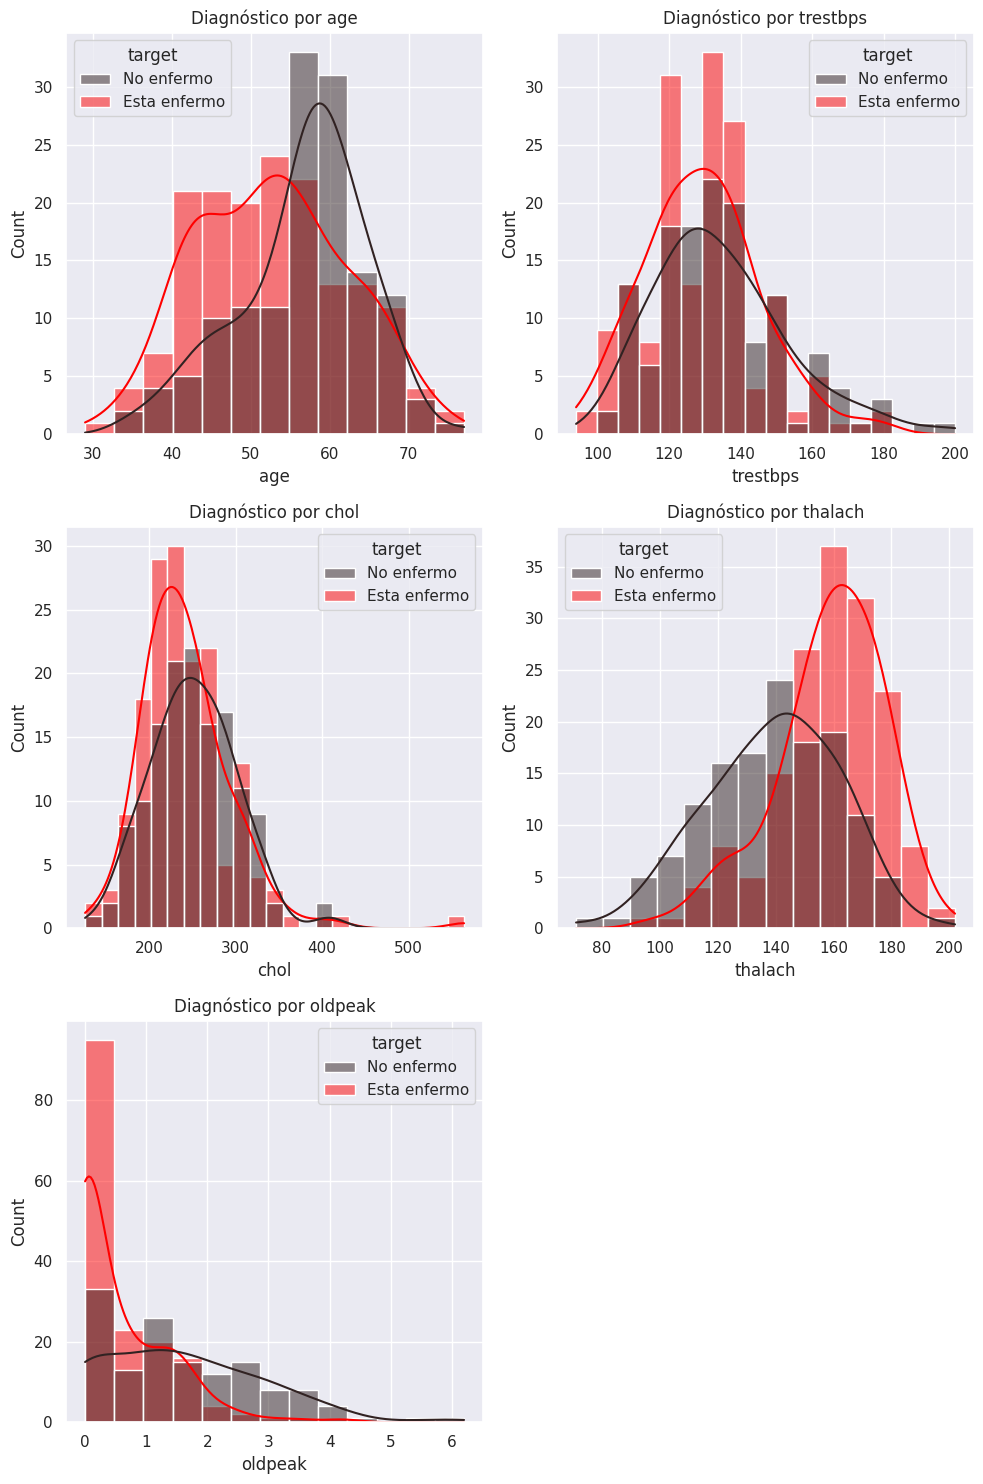

In [ ]:
plt.figure(figsize=(10, 15))
for j, column in enumerate(columnas_numericas, 0):
   if len(df_copia[column].unique()) > 10 and column != "target":
      plt.subplot(3, 2, j+1)
      sns.histplot(data=df_copia, x=column, hue="target", kde=True, palette="dark:red")
      #sns.displot(df_copia, x=column, kind="kde")
      plt.title(f"Diagnóstico por {column}")
      plt.tight_layout()

<Figure size 1000x1500 with 0 Axes>

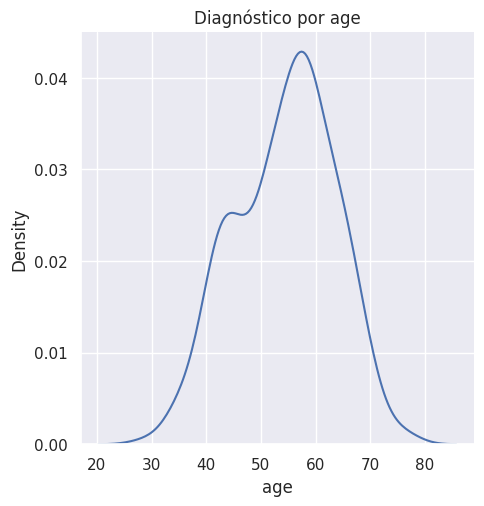

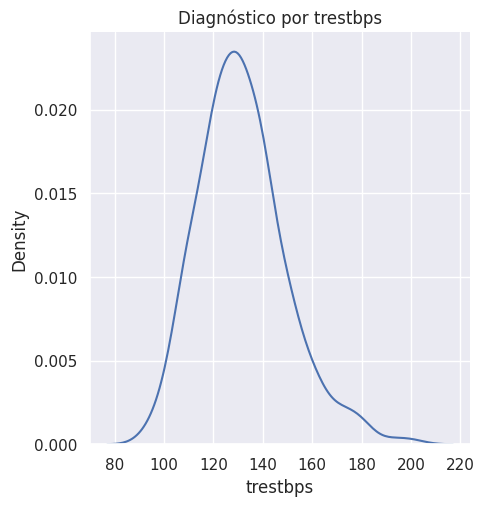

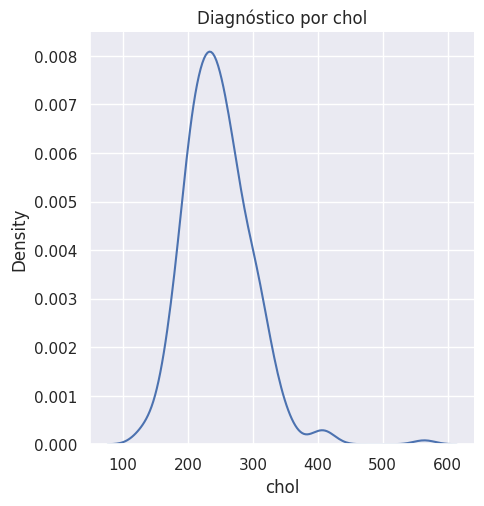

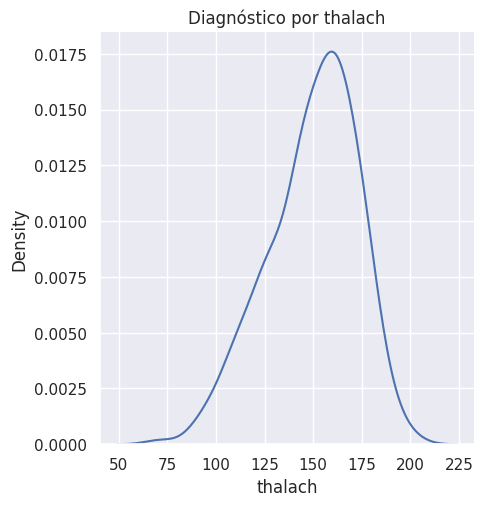

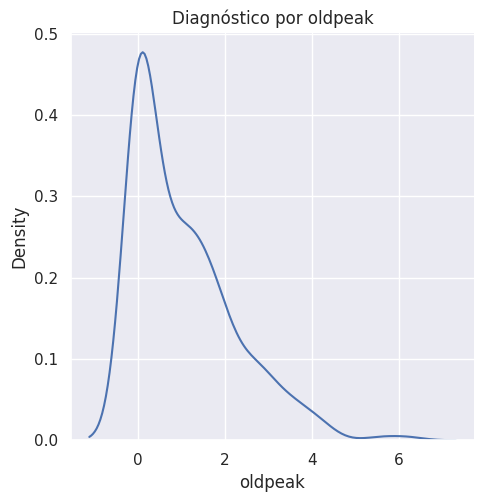

In [ ]:
plt.figure(figsize=(10, 15))
for k, column in enumerate(columnas_numericas, 0):
  #plt.subplot(3, 2, k+1)
  sns.displot(df_copia, x=column, kind="kde")
  plt.title(f"Diagnóstico por {column}")


* Interpretación
  - trestbps : presión arterial en reposo       
    - Valores superiores a 130-140 mm Hg debería ser motivo de preocupación.
  - chol : above 200 mg/dl debería ser motivo de preocupación.
  - thalach {maximum heart rate achieved} : Las personas que alcanzan un máximo de 140 tienen mayor probabilidad de sufrir enfermedades cardíacas.
  - oldpeak : La depresión inducida por el ejercicio en relación con el descanso analiza el estrés del corazón durante el ejercicio. Un corazón no saludable se estresará más.

(14.5, -0.5)

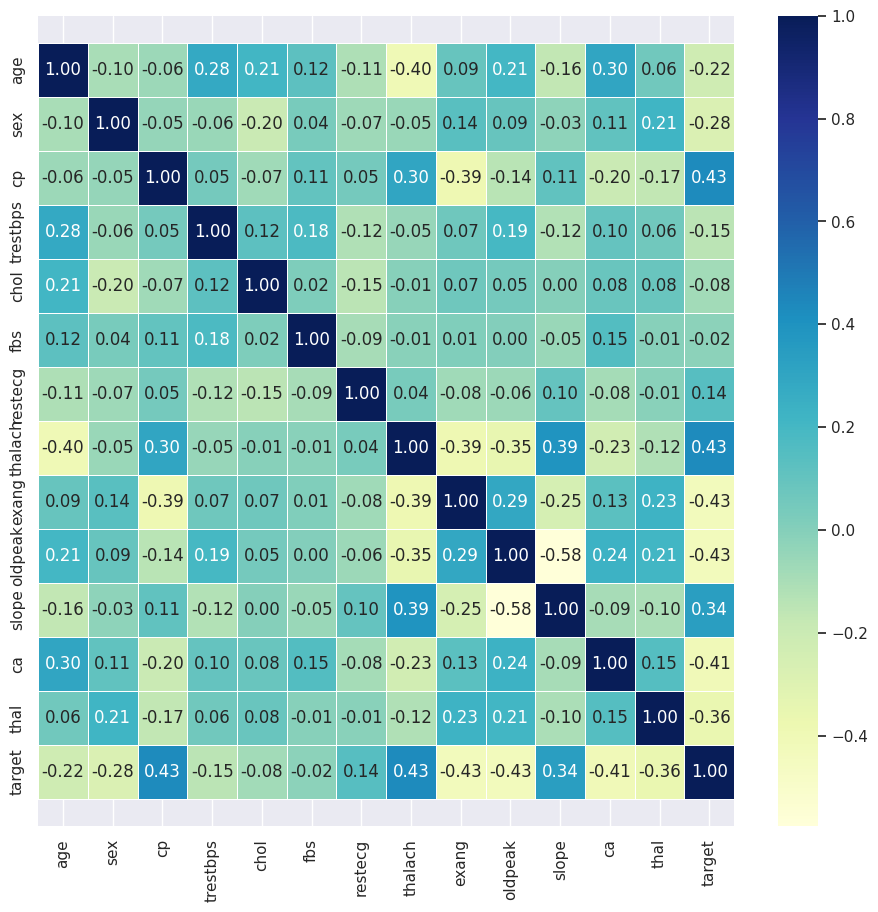

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.095553 -0.063621  0.282915  0.206558  0.122627   
sex      -0.095553  1.000000 -0.045082 -0.058444 -0.197782  0.039160   
cp       -0.063621 -0.045082  1.000000  0.046687 -0.073617  0.106182   
trestbps  0.282915 -0.058444  0.046687  1.000000  0.124519  0.181279   
chol      0.206558 -0.197782 -0.073617  0.124519  1.000000  0.017350   
fbs       0.122627  0.039160  0.106182  0.181279  0.017350  1.000000   
restecg  -0.111667 -0.067750  0.047987 -0.115801 -0.147805 -0.092791   
thalach  -0.397405 -0.054871  0.301398 -0.049065 -0.007559 -0.011622   
exang     0.094540  0.138020 -0.389029  0.069331  0.067042  0.012590   
oldpeak   0.205844  0.094571 -0.144456  0.194248  0.048360  0.003622   
slope    -0.164588 -0.026954  0.112198 -0.122942  0.000580 -0.052831   
ca        0.301811  0.111871 -0.196135  0.098451  0.083797  0.151374   
thal      0.063048  0.212873 -0.168199  0.060662  0.083201 -0.00

In [ ]:
df.drop('target', axis=1).corrwith(df.target)

,0
age,-0.222752
sex,-0.278841
cp,0.428426
trestbps,-0.146902
chol,-0.083037
fbs,-0.017150
restecg,0.142079
thalach,0.428683
exang,-0.431575
oldpeak,-0.428568


Text(0.5, 1.0, 'Correlacion con target')

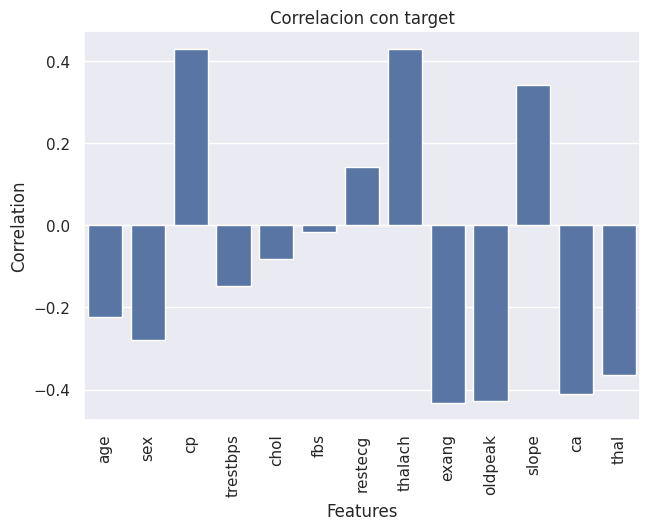

In [ ]:
sns.barplot(x=df.drop('target', axis=1).corrwith(df.target).index, y=df.drop('target', axis=1).corrwith(df.target), orient='v')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlacion con target')


Text(0.5, 1.0, 'Correlación con target')

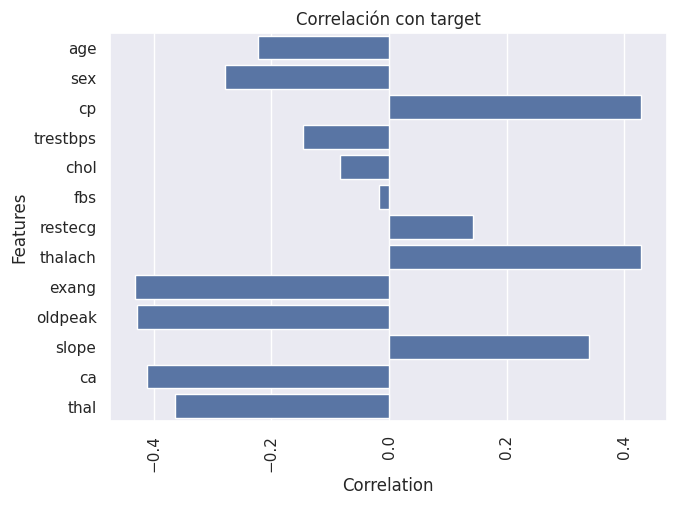

In [ ]:
sns.barplot(x=df.drop('target', axis=1).corrwith(df.target),y=df.drop('target', axis=1).corrwith(df.target).index,  orient='h')
plt.xticks(rotation=90)
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Correlación con target')

- fbs y chol son las variables menos correlacionas con la variable target.
- Las otras tienen una correlación significativa con la variable target

## Feature engineering
- En vista de que se utilizarán algoritmos que realizarán cálculos como la distancia Euclideana es necesario escalar los valores antes de entrenar los modelos.
- También será necesario convertir  las variables categoricas en variables "dummies" -binarización.
-La binarización, en particular mediante la codificación one-hot, se utiliza para convertir características categóricas en un formato numérico que los modelos de aprendizaje automático pueden procesar. Muchos algoritmos de aprendizaje automático requieren entradas numéricas, por lo que la binarización de características categóricas es un paso estándar en el proceso de preprocesamiento de datos.

In [ ]:
variables_categoricas = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

In [ ]:
df = pd.get_dummies(df, columns = variables_categoricas,dtype=int)

In [ ]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
columnas_a_escalar = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columnas_a_escalar] = sc.fit_transform(df[columnas_a_escalar])
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.268533,-0.376726,-0.671355,0.802428,-0.040167,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
1,-0.158177,0.476024,-0.845265,0.233537,1.767344,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
2,1.717876,0.760273,-1.405640,-1.079288,1.336985,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0.724671,0.930823,-0.845265,0.496102,-0.900887,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
4,0.835027,0.362324,0.913154,-1.910744,0.734481,0,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
df.columns


Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')

## Creación de modelos

* Despues de dividir los datos en datos de entrenamiento y de prueba, crearemos los  modelos.
  - Usaremos los datos de entrenamiento para entrenar el modelo (encontrar patrones).
  - Usaremos los datos de prueba para probar el modelo (usar los patrones).
  - Evaluaremos el desempeño de 7 machine learning models:
    - Logistic Regression
    - K-Nearest Neighbours
    - Support Vector machine
    - Decision Tree
    - Random Forest
    - XGBoost
    - ANN



In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 29)
(90, 29)
(210,)
(90,)


In [ ]:
# Función para imprimir los resultados de los modelos
def print_score(clasificador, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clasificador.predict(X_train)
        # ANN outputs probabilities between 0 and 1 rather than discrete clss (0 or 1).
        # Convert predictions to binary using a threshold (e.g., 0.5)
        pred = (pred > 0.5).astype(int)  # Convert probabilities to 0 or 1
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Resultados con datos de ENTRENAMIENTO:\n================================================")
        print(f"Recall : {recall_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Reporte General (Entrenamiento):\n{clf_report}")
        print("_______________________________________________")
        print(f"Matriz de Confusión: \n {confusion_matrix(y_train, pred)}\n")
    elif train==False:
        pred = clasificador.predict(X_test)
        pred = (pred > 0.5).astype(int)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Resultados con datos de PRUEBA:\n================================================")
        print(f"Recall : {recall_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Reporte General (Prueba):\n{clf_report}")
        print("_______________________________________________")
        print(f"Matriz de Confusión: \n {confusion_matrix(y_test, pred)}\n")


### 1.- Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver= "lbfgs" )
lr_clf.fit(X_train, y_train)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Resultados con datos de ENTRENAMIENTO:
Recall : 92.56%
_______________________________________________
Reporte General (Entrenamiento):
                   0           1  accuracy   macro avg  weighted avg
precision   0.895349    0.903226       0.9    0.899287      0.899887
recall      0.865169    0.925620       0.9    0.895394      0.900000
f1-score    0.880000    0.914286       0.9    0.897143      0.899755
support    89.000000  121.000000       0.9  210.000000    210.000000
_______________________________________________
Matriz de Confusión: 
 [[ 77  12]
 [  9 112]]

Resultados con datos de PRUEBA:
Recall : 88.10%
_______________________________________________
Reporte General (Prueba):
                   0          1  accuracy  macro avg  weighted avg
precision   0.880952   0.770833  0.822222   0.825893      0.829563
recall      0.770833   0.880952  0.822222   0.825893      0.822222
f1-score    0.822222   0.822222  0.822222   0.822222      0.822222
support    48.000000  42.000000  0

In [ ]:
test_score_acc= accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score_acc = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

test_score_rec= recall_score(y_test, lr_clf.predict(X_test)) * 100
train_score_rec = recall_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", round(train_score_acc,2), round(test_score_acc, 2), round(test_score_rec,2), round(train_score_rec,2) ]],
                          columns=['Model', 'Training Acc. %', 'Testing Acc. %', 'Training Recall %', 'Testing Recall %' ])
results_df

,Model,Training Acc. %,Testing Acc. %,Training Recall %,Testing Recall %
0,Logistic Regression,90.0,82.22,88.1,92.56


### 2.- K-Nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Resultados con datos de ENTRENAMIENTO:
Recall : 90.91%
_______________________________________________
Reporte General (Entrenamiento):
                   0           1  accuracy   macro avg  weighted avg
precision   0.875000    0.901639  0.890476    0.888320      0.890349
recall      0.865169    0.909091  0.890476    0.887130      0.890476
f1-score    0.870056    0.905350  0.890476    0.887703      0.890392
support    89.000000  121.000000  0.890476  210.000000    210.000000
_______________________________________________
Matriz de Confusión: 
 [[ 77  12]
 [ 11 110]]

Resultados con datos de PRUEBA:
Recall : 85.71%
_______________________________________________
Reporte General (Prueba):
                   0          1  accuracy  macro avg  weighted avg
precision   0.853659   0.734694  0.788889   0.794176      0.798142
recall      0.729167   0.857143  0.788889   0.793155      0.788889
f1-score    0.786517   0.791209  0.788889   0.788863      0.788706
support    48.000000  42.000000  0

In [ ]:
test_score_acc= accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score_acc = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

test_score_rec= recall_score(y_test, knn_clf.predict(X_test)) * 100
train_score_rec = recall_score(y_train, knn_clf.predict(X_train)) * 100

results_df_1 = pd.DataFrame(data=[["K-nearest  neighbor", round(train_score_acc,2), round(test_score_acc, 2), round(test_score_rec,2), round(train_score_rec,2) ]],
                          columns=['Model', 'Training Acc. %', 'Testing Acc. %', 'Training Recall %', 'Testing Recall %' ])
results_df = pd.concat([results_df, results_df_1], ignore_index=True)
results_df

,Model,Training Acc. %,Testing Acc. %,Training Recall %,Testing Recall %
0,Logistic Regression,90.00,82.22,88.10,92.56
1,K-nearest neighbor,89.05,78.89,85.71,90.91


### 3.- Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svc_clf = SVC(kernel = "rbf", gamma =0.1, C =1.0)
svc_clf.fit(X_train, y_train)

print_score(svc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svc_clf, X_train, y_train, X_test, y_test, train=False)

Resultados con datos de ENTRENAMIENTO:
Recall : 95.04%
_______________________________________________
Reporte General (Entrenamiento):
                   0           1  accuracy   macro avg  weighted avg
precision   0.931034    0.934959  0.933333    0.932997      0.933296
recall      0.910112    0.950413  0.933333    0.930263      0.933333
f1-score    0.920455    0.942623  0.933333    0.931539      0.933228
support    89.000000  121.000000  0.933333  210.000000    210.000000
_______________________________________________
Matriz de Confusión: 
 [[ 81   8]
 [  6 115]]

Resultados con datos de PRUEBA:
Recall : 90.48%
_______________________________________________
Reporte General (Prueba):
                   0          1  accuracy  macro avg  weighted avg
precision   0.894737   0.730769       0.8   0.812753      0.818219
recall      0.708333   0.904762       0.8   0.806548      0.800000
f1-score    0.790698   0.808511       0.8   0.799604      0.799010
support    48.000000  42.000000   

In [ ]:
test_score_acc = accuracy_score(y_test, svc_clf.predict(X_test)) * 100
train_score_acc = accuracy_score(y_train, svc_clf.predict(X_train)) * 100

test_score_rec = recall_score(y_test, svc_clf.predict(X_test)) * 100
train_score_rec = recall_score(y_train, svc_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", round(train_score_acc,2), round(test_score_acc, 2), round(test_score_rec,2), round(train_score_rec,2) ]],
                          columns=['Model', 'Training Acc. %', 'Testing Acc. %', 'Training Recall %', 'Testing Recall %' ])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Acc. %,Testing Acc. %,Training Recall %,Testing Recall %
0,Logistic Regression,90.00,82.22,88.10,92.56
1,K-nearest neighbor,89.05,78.89,85.71,90.91
2,Support Vector Machine,93.33,80.00,90.48,95.04


### 4.- Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

print_score(dt_clf, X_train, y_train, X_test, y_test, train=True)
print_score(dt_clf, X_train, y_train, X_test, y_test, train=False)

Resultados con datos de ENTRENAMIENTO:
Recall : 100.00%
_______________________________________________
Reporte General (Entrenamiento):
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    89.0  121.0       1.0      210.0         210.0
_______________________________________________
Matriz de Confusión: 
 [[ 89   0]
 [  0 121]]

Resultados con datos de PRUEBA:
Recall : 64.29%
_______________________________________________
Reporte General (Prueba):
                   0          1  accuracy  macro avg  weighted avg
precision   0.673913   0.613636  0.644444   0.643775      0.645784
recall      0.645833   0.642857  0.644444   0.644345      0.644444
f1-score    0.659574   0.627907  0.644444   0.643741      0.644796
support    48.000000  42.000000  0.644444  90.000000     90.000000
_____________________

In [ ]:
test_score_acc = accuracy_score(y_test, dt_clf.predict(X_test)) * 100
train_score_acc = accuracy_score(y_train, dt_clf.predict(X_train)) * 100

test_score_rec = recall_score(y_test, dt_clf.predict(X_test)) * 100
train_score_rec = recall_score(y_train, dt_clf.predict(X_train)) * 100

results_df_3 = pd.DataFrame(data=[["Decision Tree", round(train_score_acc,2), round(test_score_acc,   2), round(test_score_rec,2), round(train_score_rec,2) ]],
                          columns=['Model', 'Training Acc. %', 'Testing Acc. %', 'Training Recall %', 'Testing Recall %' ])
results_df = pd.concat([results_df, results_df_3], ignore_index=True)
results_df

,Model,Training Acc. %,Testing Acc. %,Training Recall %,Testing Recall %
0,Logistic Regression,90.00,82.22,88.10,92.56
1,K-nearest neighbor,89.05,78.89,85.71,90.91
2,Support Vector Machine,93.33,80.00,90.48,95.04
3,Decision Tree,100.00,64.44,64.29,100.00


### 5.- Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Resultados con datos de ENTRENAMIENTO:
Recall : 100.00%
_______________________________________________
Reporte General (Entrenamiento):
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    89.0  121.0       1.0      210.0         210.0
_______________________________________________
Matriz de Confusión: 
 [[ 89   0]
 [  0 121]]

Resultados con datos de PRUEBA:
Recall : 85.71%
_______________________________________________
Reporte General (Prueba):
                   0          1  accuracy  macro avg  weighted avg
precision   0.853659   0.734694  0.788889   0.794176      0.798142
recall      0.729167   0.857143  0.788889   0.793155      0.788889
f1-score    0.786517   0.791209  0.788889   0.788863      0.788706
support    48.000000  42.000000  0.788889  90.000000     90.000000
_____________________

In [ ]:
test_score_acc = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score_acc = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

test_score_rec = recall_score(y_test, rf_clf.predict(X_test)) * 100
train_score_rec = recall_score(y_train, rf_clf.predict(X_train)) * 100

results_df_4 = pd.DataFrame(data=[["Random Forest", round(train_score_acc,2), round(test_score_acc, 2), round(test_score_rec,2), round(train_score_rec,2) ]],
                             columns=['Model', 'Training Acc. %', 'Testing Acc. %', 'Training Recall %', 'Testing Recall %' ])
results_df = pd.concat([results_df, results_df_4], ignore_index=True)
results_df

,Model,Training Acc. %,Testing Acc. %,Training Recall %,Testing Recall %
0,Logistic Regression,90.00,82.22,88.10,92.56
1,K-nearest neighbor,89.05,78.89,85.71,90.91
2,Support Vector Machine,93.33,80.00,90.48,95.04
3,Decision Tree,100.00,64.44,64.29,100.00
4,Random Forest,100.00,78.89,85.71,100.00


### 6.- XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Resultados con datos de ENTRENAMIENTO:
Recall : 100.00%
_______________________________________________
Reporte General (Entrenamiento):
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    89.0  121.0       1.0      210.0         210.0
_______________________________________________
Matriz de Confusión: 
 [[ 89   0]
 [  0 121]]

Resultados con datos de PRUEBA:
Recall : 83.33%
_______________________________________________
Reporte General (Prueba):
                 0          1  accuracy  macro avg  weighted avg
precision   0.8250   0.700000  0.755556   0.762500      0.766667
recall      0.6875   0.833333  0.755556   0.760417      0.755556
f1-score    0.7500   0.760870  0.755556   0.755435      0.755072
support    48.0000  42.000000  0.755556  90.000000     90.000000
_______________________________

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:50:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
test_score_acc = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score_acc = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

test_score_rec = recall_score(y_test, xgb_clf.predict(X_test)) * 100
train_score_rec = recall_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_5 = pd.DataFrame(data=[["XGBoost", round(train_score_acc,5), round(test_score_acc, 5), round(test_score_rec,5), round(train_score_rec,5) ]],
                          columns=['Model', 'Training Acc. %', 'Testing Acc. %', 'Training Recall %', 'Testing Recall %' ])
results_df = pd.concat([results_df, results_df_5], ignore_index=True)
results_df

,Model,Training Acc. %,Testing Acc. %,Training Recall %,Testing Recall %
0,Logistic Regression,90.00,82.22000,88.10000,92.56
1,K-nearest neighbor,89.05,78.89000,85.71000,90.91
2,Support Vector Machine,93.33,80.00000,90.48000,95.04
3,Decision Tree,100.00,64.44000,64.29000,100.00
4,Random Forest,100.00,78.89000,85.71000,100.00
5,XGBoost,100.00,75.55556,83.33333,100.00


### 7. ANN

In [ ]:
! pip install keras

In [ ]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

In [ ]:
ann_classifier = Sequential()

# Adding the input layer and the first hidden layer
ann_classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))

# Adding the second hidden layer
ann_classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
ann_classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
ann_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann_classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5002 - loss: 0.6930
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5784 - loss: 0.6904
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6357 - loss: 0.6779 
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7475 - loss: 0.6518
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7967 - loss: 0.5943 
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8037 - loss: 0.5220
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7971 - loss: 0.4578
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8850 - loss: 0.3719 
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8879 - loss: 0.3437
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9039 - loss: 0.3098
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8949 - loss: 0.3075
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accura

In [ ]:
print_score(ann_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(ann_classifier, X_train, y_train, X_test, y_test, train=False)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Resultados con datos de ENTRENAMIENTO:
Recall : 92.56%
_______________________________________________
Reporte General (Entrenamiento):
                   0           1  accuracy   macro avg  weighted avg
precision   0.895349    0.903226       0.9    0.899287      0.899887
recall      0.865169    0.925620       0.9    0.895394      0.900000
f1-score    0.880000    0.914286       0.9    0.897143      0.899755
support    89.000000  121.000000       0.9  210.000000    210.000000
_______________________________________________
Matriz de Confusión: 
 [[ 77  12]
 [  9 112]]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Resultados con datos de PRUEBA:
Recall : 90.48%
_______________________________________________
Reporte General (Prueba):
                   0          1  accuracy  macro avg  weighted avg
precision   0.900000   0.760000  0.822222   0.830000      0.834667
recall      0.750000   0.904762  0.822222   0.827381      0.822222
f1-score    0.818182   0.

In [ ]:
ann_pred_train = (ann_classifier.predict(X_train) > 0.5).astype(int)
ann_pred_test = (ann_classifier.predict(X_test) > 0.5).astype(int)
test_score_acc = accuracy_score(y_test, ann_pred_test) * 100
train_score_acc = accuracy_score(y_train, ann_pred_train) * 100

test_score_rec = recall_score(y_test, ann_pred_test) * 100
train_score_rec = recall_score(y_train, ann_pred_train) * 100

results_df_5 = pd.DataFrame(data=[["ANN", round(train_score_acc,5), round(test_score_acc, 5), round(test_score_rec,5), round(train_score_rec,5) ]],
                          columns=['Model', 'Training Acc. %', 'Testing Acc. %', 'Training Recall %', 'Testing Recall %' ])
results_df = pd.concat([results_df, results_df_5], ignore_index=True)
results_df

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


,Model,Training Acc. %,Testing Acc. %,Training Recall %,Testing Recall %
0,Logistic Regression,90.00,82.22000,88.10000,92.56000
1,K-nearest neighbor,89.05,78.89000,85.71000,90.91000
2,Support Vector Machine,93.33,80.00000,90.48000,95.04000
3,Decision Tree,100.00,64.44000,64.29000,100.00000
4,Random Forest,100.00,78.89000,85.71000,100.00000
5,XGBoost,100.00,75.55556,83.33333,100.00000
6,ANN,90.00,82.22222,90.47619,92.56198


## Conclusiones
  - El mejor resultado se ha conseguido con el algoritmo SVM, recordando que la métrica mas adecuada es "Recall" la que prioriza la identificación de todos los casos positivos verdaderos, incluso si eso significa aceptar una tasa más alta de falsos positivos, lo que es crucial para no pasar por alto ningún caso potencialmente fatal de la enfermedad.
  - Cercano a SVM esta la ANN.
  - Decision Tree, Random Forest y XGBoost arrojan valores de Recall del 100% lo cual no es confiable.
  - Aun se podrían utilizar  tecnicas de Ensemble para mejorar las metricas.
  - Se guardará el modelo SVM para un posterior despliegue, utilizando PIKCLE

## Guardar modelo

In [ ]:
import pickle
#joblib.dump(svc_clf, 'modelo_entrenado.pkl') # Guardo el modelo.
filename = 'modelo_entrenado.pkl'
pickle.dump(svc_clf, open(filename, 'wb'))